In [6]:
# !pip install matplotlib # opencv-python numpy 

approx=4
approx=4
approx=4
approx=4
approx=4
approx=4
approx=4
approx=4
approx=4
approx=4


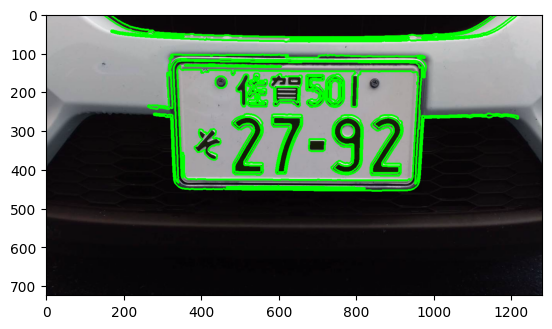

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_dir = '/Users/yama/python/ocr_dir/'
img = cv2.imread(f'{img_dir}license_plate.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 平滑化処理 todo:エッジ検出の後の方が良い？
gray_image = cv2.bilateralFilter(img_gray, 11, 17, 17) # arg: img, d(フィルタの直径), sigmaColor(色空間の標準偏差), sigmaSpace(座標空間の標準偏差)
edged_image = cv2.Canny(gray_image, 30, 200) # todo: to check 
# close dilation, erosionを行いエッジを2本の細いエッジをまとめる
img_close = cv2.morphologyEx(edged_image, cv2.MORPH_CLOSE, np.ones((5, 5), dtype=gray_image.dtype))
img_dilation = cv2.dilate(edged_image, np.ones((5, 5), dtype=edged_image.dtype))
contours, new = cv2.findContours(img_dilation.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img1 = img.copy()
cv2.drawContours(img1, contours, -1, (0, 255, 0), 3) # 先にエッジ膨張させるのもあり
plt.imshow(img1)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:30]
# stores the license plate contour
screenCnt = None
img2 = img.copy()
# draws top 30 contours
cv2.drawContours(img2, contours, -1, (0, 255, 0), 3)
plt.imshow(img2)

count = 0
idx = 0
for c in contours:
    # approximate the license plate contour
    contour_perimeter = cv2.arcLength(c, True) # 周囲長の計算
    approx = cv2.approxPolyDP(c, 0.05 * contour_perimeter, True)
    # Look for contours with 4 corners
    if len(approx) == 4:
        print('approx=4')
        screenCnt = approx
        # find the coordinates of the license plate contour
        x, y, w, h = cv2.boundingRect(c)
        new_img = img[ y: y + h, x: x + w]
        # stores the new image
        cv2.imwrite(f'{img_dir}str_{idx}.png',new_img)
        idx += 1
        # break
# draws the license plate contour on original image
# cv2.drawContours(original_image , [screenCnt], -1, (0, 255, 0), 3)
# cv2.imshow("detected license plate", original_image )
# # 画像の高さと幅を取得する
# height, width = img.shape[:2]
# # オブジェクトの四隅のポイントを定義
# input_pts = np.float32([[71, 95], [420,45], [160, 311], [505,245]])
# # アウトプットは元画像と同じサイズ
# output_pts = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
# # getPerspectiveTransformの行列の取得
# matrix = cv2.getPerspectiveTransform(input_pts, output_pts)
# # 変換の適用
# result = cv2.warpPerspective(img, matrix, (width, height))
# # BGRからRGBへの変換
# result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)


In [50]:
len(contours)

30

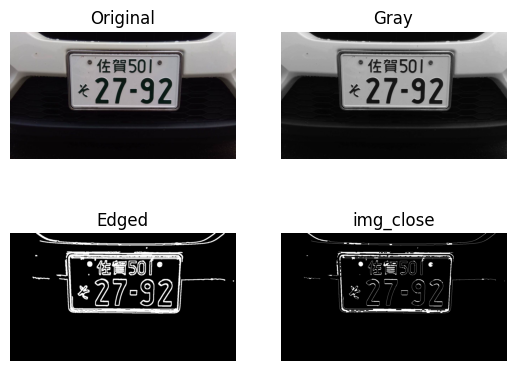

In [56]:
# 加工前と加工後の画像の確認
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Original')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Gray')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(edged_image, cmap='gray')
plt.title('Edged')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(img_close, cmap='gray')
plt.title('img_close')
plt.axis('off')
plt.show()